# San Francisco Airport Database

## Week 1

### This week, I pulled the data from the SFO Landings database and began visualizations. I tried 3 different approaches to identify different trends in the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy.optimize import curve_fit
import math

# import hashlib
%matplotlib inline
pd.set_option('mode.chained_assignment', None)

sns.set(style="dark")
# plt.style.use("ggplot")

In [2]:
landings = pd.read_csv("Air_Traffic_Landings_Statistics.csv")
landings.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000


In [3]:
monthly = landings.groupby("Activity Period").sum()
monthly = monthly.reset_index()
monthly.head()

,Activity Period,Landing Count,Total Landed Weight
0,200507,14064,2436639140
1,200508,14062,2421824470
2,200509,13022,2249329540
3,200510,13360,2296568850
4,200511,12676,2186727030


## Approach 1: Linear Regression

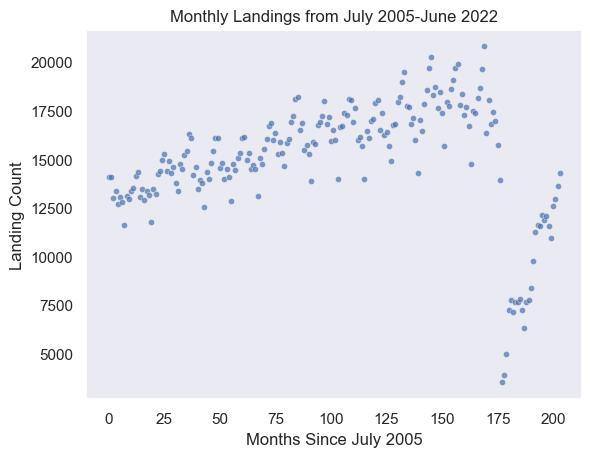

In [4]:
x_axis = np.arange(0, len(monthly), 1)
sns.scatterplot(data=monthly, x=x_axis, y='Landing Count', s=20, alpha = 0.7);
plt.title("Monthly Landings from July 2005-June 2022")
plt.xlabel("Months Since July 2005");

### Linear regression is not possible because of the dip in 2020 and the significant change in data thereafter, so I decided to take a new approach.

## Approach 2: Histograms of Landing Counts

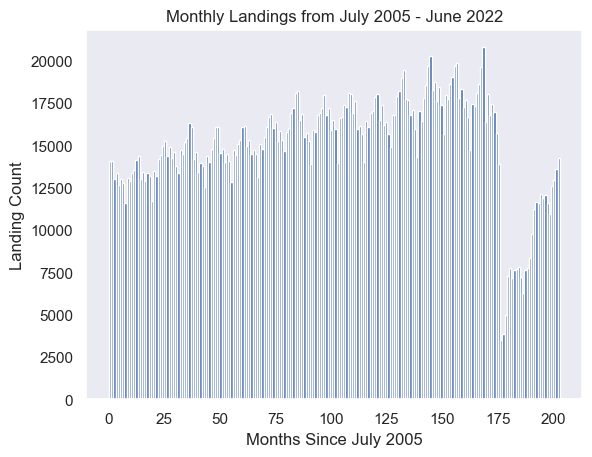

In [5]:
plt.hist(x_axis, bins=204, weights=monthly["Landing Count"])
plt.title("Monthly Landings from July 2005 - June 2022")
plt.xlabel("Months Since July 2005")
plt.ylabel("Landing Count");

### To reduce overplotting, I grouped every four-month interval together, using the summed totals on the y-axis.

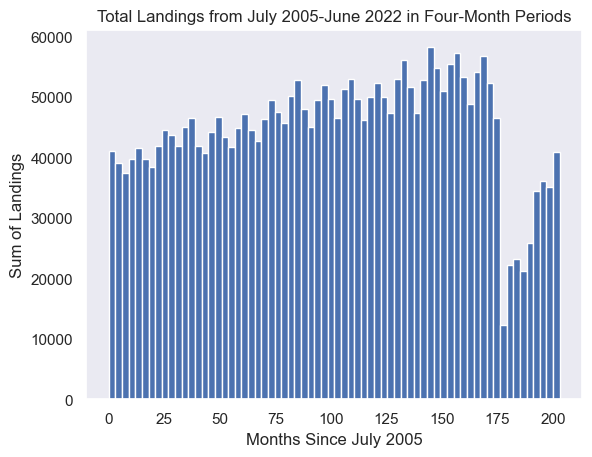

In [6]:
plt.hist(x_axis, bins=68, weights=monthly["Landing Count"])
plt.title("Total Landings from July 2005-June 2022 in Four-Month Periods")
plt.xlabel("Months Since July 2005")
plt.ylabel("Sum of Landings");

### To further simplify the data and get a broader view, I also decided to plot the yearly totals of landing counts. Because the data from 2005 and 2022 included limited months, I omitted them from the visualization.

In [7]:
yearly = landings.loc[:, ["Activity Period", "Landing Count"]]
yearly["Year"] = (yearly.loc[:, "Activity Period"] // 100)
yearly = yearly.drop(columns=["Activity Period"])
yearly = yearly.groupby("Year").sum()
yearly = yearly.reset_index()
yearly = yearly.drop([0, len(yearly) - 1])
yearly.head()

,Year,Landing Count
1,2006,158510
2,2007,168611
3,2008,175626
4,2009,174930
5,2010,178223


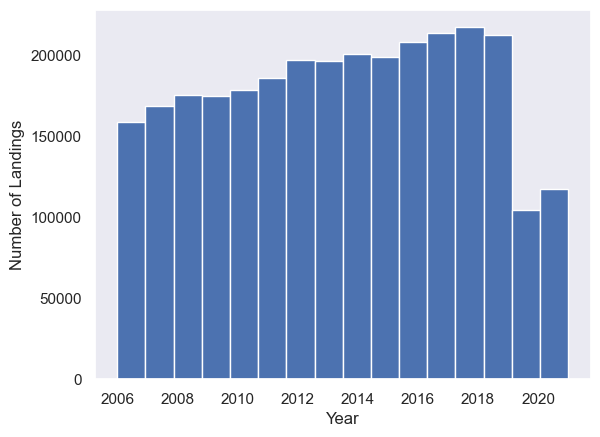

In [69]:
# sns.barplot(data=yearly, x="Year", y="Landing Count")
plt.hist(yearly["Year"], bins=16, weights=yearly["Landing Count"])
# plt.title("Yearly Landings from 2006-2021")
plt.xlabel("Year")
plt.ylabel("Number of Landings");

### Conclusion of Approach 2: The grouped monthly data appears to be the most informative visualization because it reduces overplotting while representing all the data points.

## Approach 3: Landings per Aircraft Type

### There are two main types of aircrafts that contribute to this data: freighter and passenger planes. 

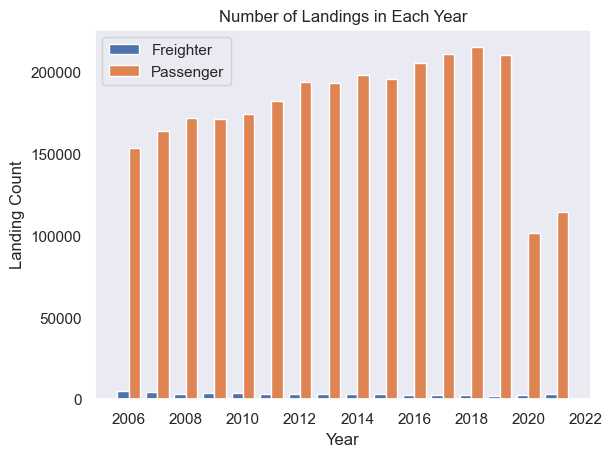

In [9]:
aircraft = landings.loc[:, ["Activity Period", "Landing Count", "Landing Aircraft Type"]]
aircraft["Year"] = (aircraft.loc[:, "Activity Period"] // 100)
aircraft = aircraft.drop(columns=["Activity Period"])
aircraft = aircraft.groupby(["Year", "Landing Aircraft Type"]).sum()
aircraft = aircraft.reset_index()


freighter = aircraft[aircraft["Landing Aircraft Type"] == "Freighter"]
freighter = freighter.reset_index(drop=True)
freighter = freighter.drop([0, len(freighter) - 1])
# # freighter = aircraft.reset_index()
passenger = aircraft[aircraft["Landing Aircraft Type"] == "Passenger"]
passenger = passenger.reset_index(drop=True)
passenger = passenger.drop([0, len(passenger) - 1])
# passenger = aircraft.reset_index()
# passenger.head()


years = yearly["Year"]
freighter_count = freighter["Landing Count"]
passenger_count = passenger["Landing Count"]

  
plt.bar(years - 0.2, freighter_count, 0.4, label = 'Freighter')
plt.bar(years + 0.2, passenger_count, 0.4, label = 'Passenger')
plt.xlabel("Year")
plt.ylabel("Landing Count")
plt.title("Number of Landings in Each Year")
plt.legend()
plt.show()


### Approach 3 Conclusion: This was not the best representation of the data, though keeping the distinction between freighter and passenger planes could be useful in later calculations.

## Week 1 Wrap Up
This week, I was able to play with the data and figure out what kinds of visualizations would best suit the data. Next week, I plan on comparing international vs. domestic flights, researching their respective fuel usages, and potentially moving on to other airports.

# Week 2

### This week, I limited the data to only include the data prior to COVID. I also omitted the data from 2005 because it only included data from July forth, making throwing off the visualizations.

In [10]:
monthly = landings.loc[:, ["Activity Period", "Landing Count"]]
monthly["Month"] = (monthly.loc[:, "Activity Period"] % 100)
monthly["Year"] = (monthly.loc[:, "Activity Period"] // 100)
monthly = monthly.drop(columns=["Activity Period"])
monthly = monthly[(monthly["Year"] < 2020) & (monthly["Year"] > 2005)]
monthly = monthly.groupby(["Year","Month"]).sum()
monthly = monthly.reset_index()
monthly.head()

,Year,Month,Landing Count
0,2006,1,12803
1,2006,2,11600
2,2006,3,13089
3,2006,4,12927
4,2006,5,13364


### First, I wanted to see how the seasons varied each year.

In [11]:
seasonal = monthly.copy()
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
seasonal['Season'] = seasonal['Month'].apply(lambda x: season_dict[x])
seasonal = seasonal.groupby(['Year', 'Season']).sum().drop(columns=['Month']).reset_index()
seasonal.head()

,Year,Season,Landing Count
0,2006,Fall,39383
1,2006,Spring,39380
2,2006,Summer,41995
3,2006,Winter,37752
4,2007,Fall,43540


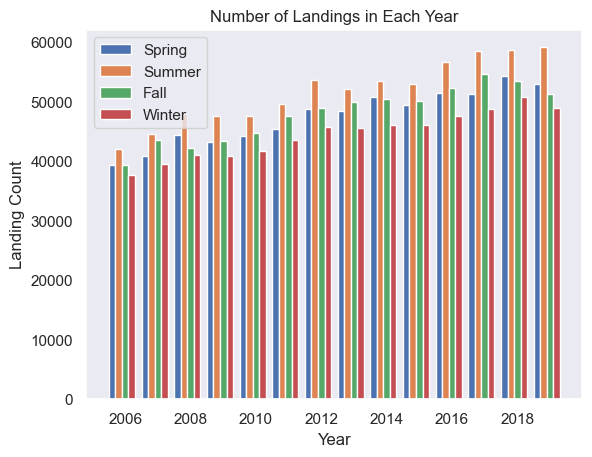

In [12]:
years = np.arange(2006, 2020)
spring = seasonal[seasonal['Season'] == 'Spring']['Landing Count']
summer = seasonal[seasonal['Season'] == 'Summer']['Landing Count']
fall = seasonal[seasonal['Season'] == 'Fall']['Landing Count']
winter = seasonal[seasonal['Season'] == 'Winter']['Landing Count']

plt.bar(years - 0.4, spring, 0.2, label = 'Spring')
plt.bar(years - 0.2, summer, 0.2, label = 'Summer')
plt.bar(years + 0.0, fall, 0.2, label = 'Fall')
plt.bar(years + 0.2, winter, 0.2, label = 'Winter')

plt.xlabel("Year")
plt.ylabel("Landing Count")
plt.title("Number of Landings in Each Year")
plt.legend()
plt.show()

We can see that summer (blue) consistently has the most number of landings while winter (grey) consistently has the least number of landings. Spring (red) and fall (purple) fluctuate between 2nd and 3rd place and are often quite close. 

## Next, I averaged the total landings in each month and visualized them in a histogram.

In [13]:
monthly_avg = monthly.groupby('Month').mean()
monthly_avg = monthly_avg.drop(columns=['Year'])
monthly_avg.rename(columns={'Landing Count': 'Average Landings'}, inplace=True)
monthly_avg.reset_index(inplace=True)
monthly_avg.head()

,Month,Average Landings
0,1,15005.428571
1,2,13665.428571
2,3,15680.357143
3,4,15483.357143
4,5,16338.928571


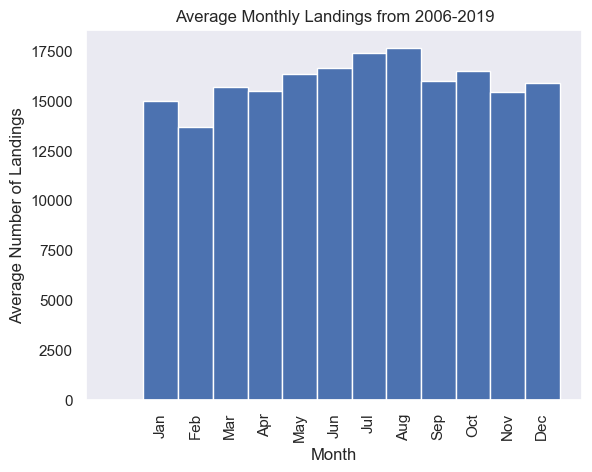

In [14]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.hist(monthly_avg["Month"], bins=np.arange(14)-0.5, weights=monthly_avg["Average Landings"])
plt.title("Average Monthly Landings from 2006-2019")
plt.xlabel("Month")
plt.xticks(monthly_avg["Month"], months, rotation='vertical')
plt.ylabel("Average Number of Landings");

### Because of the difference in number of days in each month, I then factored in the difference by visualizing the average daily number of landings per month.

In [15]:
# There are 3 leap years (days where Feb has 29 days) from 2006-2019
feb_avg = (11 * 28 + 3 * 29) / 14
days_per_month = {1: 31,
                  2: feb_avg,
                  3: 31, 
                  4: 30,
                  5: 31,
                  6: 30,
                  7: 31,
                  8: 30,
                  9: 31,
                  10: 31,
                  11: 30,
                  12: 31}
daily_avg = monthly_avg.copy()
daily_avg['Days Per Month'] = daily_avg['Month'].apply(lambda x: days_per_month[x])
daily_avg['Landings Per Day'] = daily_avg['Average Landings'] / daily_avg['Days Per Month']
daily_avg.head()

,Month,Average Landings,Days Per Month,Landings Per Day
0,1,15005.428571,31.000000,484.046083
1,2,13665.428571,28.214286,484.344304
2,3,15680.357143,31.000000,505.817972
3,4,15483.357143,30.000000,516.111905
4,5,16338.928571,31.000000,527.062212


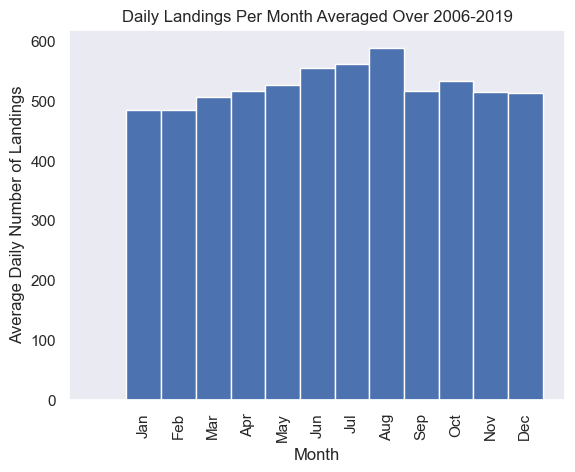

In [16]:
plt.hist(daily_avg["Month"], bins=np.arange(14)-0.5, weights=daily_avg["Landings Per Day"])
plt.title("Daily Landings Per Month Averaged Over 2006-2019")
plt.xlabel("Month")
plt.xticks(daily_avg["Month"], months, rotation='vertical')
plt.ylabel("Average Daily Number of Landings");

## Then, I began working on the sinusoidal regression model.

In [17]:
daily_avg_across = monthly.copy()
daily_avg_across['Days Per Month'] = daily_avg_across['Month'].apply(lambda x: days_per_month[x])
daily_avg_across['Landings Per Day'] = daily_avg_across['Landing Count'] / daily_avg_across['Days Per Month']
daily_avg_across.head()

,Year,Month,Landing Count,Days Per Month,Landings Per Day
0,2006,1,12803,31.000000,413.000000
1,2006,2,11600,28.214286,411.139241
2,2006,3,13089,31.000000,422.225806
3,2006,4,12927,30.000000,430.900000
4,2006,5,13364,31.000000,431.096774


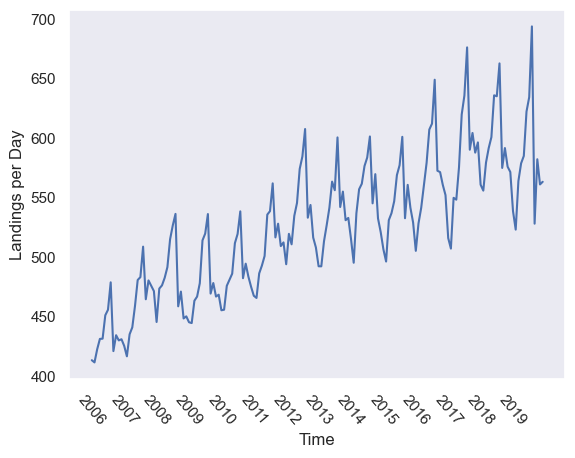

In [67]:
X = np.arange(0, len(daily_avg_across))
y = daily_avg_across['Landings Per Day'].tolist()
plt.plot(X, y)
x_ticks = np.arange(0, len(X), step=12)
x_labels = np.arange(2006, 2020)
plt.xticks(x_ticks, x_labels, rotation=310)
# plt.title("Average Daily Landings Per Month")
plt.xlabel("Time")
plt.ylabel("Landings per Day")
plt.show()

#### Functions that create the predicted model and get the parameters of the sinusoidal function:

In [19]:
def sinusoid(x,A,offset,omega,phase):
    return A*np.sin(omega*x+phase) + offset

T = 12
def get_p0(x, y):
    A0 = (max(y[0:T]) - min(y[0:T]))/2
    offset0 = y[0]
    phase0 = 0
    omega0 = 2.0*np.pi/T
    return [A0, offset0, omega0, phase0]

#### Graph the initial sinusoidal function:

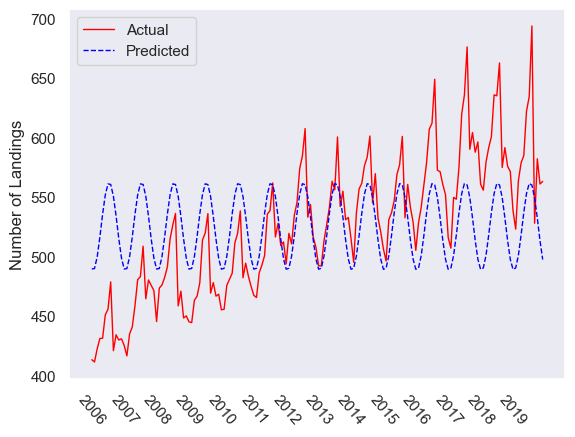

In [20]:
param, covariance = curve_fit(sinusoid, X, y, p0=get_p0(X,y))
plt.xticks(x_ticks, x_labels, rotation=310)
plt.ylabel("Number of Landings")
plt.plot(X, y, color="red", linewidth=1, label="Actual")
plt.plot(X, sinusoid(X, *param), color="blue", linewidth=1, linestyle="dashed", label="Predicted")
plt.legend()
plt.show()

#### Get the maximums and minimums of each year. Then, find the offset of the sine graph:

In [21]:
def get_peaks(y, metrics):
    n = int(math.ceil(len(y)/T))
    step = 0
    x_peaks = []
    y_peaks = []
    for i in np.arange(0, n):
        peak_index = y.index(metrics(y[step:step+T]))
        x_peaks.append(peak_index)
        y_peaks.append(y[peak_index])
        step = step+T
    return [x_peaks,y_peaks]

min_peaks = get_peaks(y,min)
max_peaks = get_peaks(y,max)

In [22]:
A = []
offset = []
for i in range(0, len(min_peaks[1])):
    c_a = (max_peaks[1][i] - min_peaks[1][i])/2
    c_offset = min_peaks[1][i] + c_a
    for j in range(0,T):
        A.append(c_a)
        offset.append(c_offset)

#### Update the parameters of the sine function by factoring in the minimum, maximum, and offset values.

In [23]:
features = [X, A, offset]
def variable_sinusoid(features,omega,phase):
    x = features[0]
    A = features[1]
    offset = features[2]
    return A*np.sin(omega*x+phase) + offset

def variable_get_p0(x, y): 
    phase0 = 0
    omega0 = 2.*np.pi/T
    return [omega0, phase0]

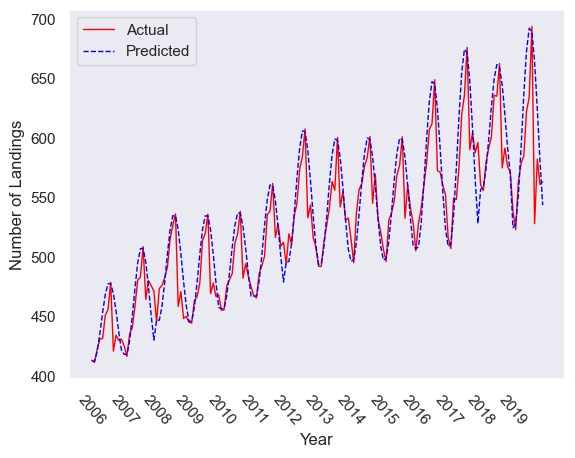

In [24]:
param, covariance = curve_fit(variable_sinusoid, features, y, p0=variable_get_p0(X,y))
plt.xticks(x_ticks, x_labels, rotation=310)
plt.ylabel("Number of Landings")
plt.xlabel("Year")
plt.plot(X, y, color="red", linewidth=1, label = 'Actual')
plt.plot(X, variable_sinusoid(features, *param), color="blue", linestyle="dashed", linewidth=1, label='Predicted')
plt.legend()
plt.show()

## Week 2 Wrap Up
This week, I limited the data to 2006-2019 to get the most accurate distributions while omitting post-COVID data. Additionally, I switched my approach so that I would be looking at the average number of landings per day rather than per month to account for the difference in the number of days in each month. Although February seemed to be the outlier last week, this new approach showed us that February was not significantly lower than January, and the discrepancy was because it has fewer days. In fact, February has more flights per day on average than January. Finally, I fit a sinusoidal model to the data including the linear increase and the offset. Next week, I plan on using linear regression to predict future data, and potentially move on to datasets from the other airports.

# Week 3

### Using the sinusoidal approximation model from last week, I tried to predict future data. I used linear regression for the minimums and maximums of each wave. I also used a variable $yr\_to\_predict\_to$ so that we can choose what year we want the visualizations to go up to.

In [25]:
# reshape x_peaks
x_min_peaks = list(map(lambda l:[l], min_peaks[0])) 
x_max_peaks = list(map(lambda l:[l], max_peaks[0]))
# min model
model_min = linear_model.LinearRegression()
model_min.fit(x_min_peaks,min_peaks[1])
# max model
model_max = linear_model.LinearRegression()
model_max.fit(x_max_peaks,max_peaks[1])


yr_to_predict_to = 2025


yrs_into_future = yr_to_predict_to - 2019
for i in range(1, yrs_into_future + 1):
    x_min_peaks.append([x_min_peaks[len(x_min_peaks) -1][0] + T])
    x_max_peaks.append([x_max_peaks[len(x_max_peaks) -1][0] + T])
y_pred_min = model_min.predict(x_min_peaks)
y_pred_max = model_max.predict(x_max_peaks)

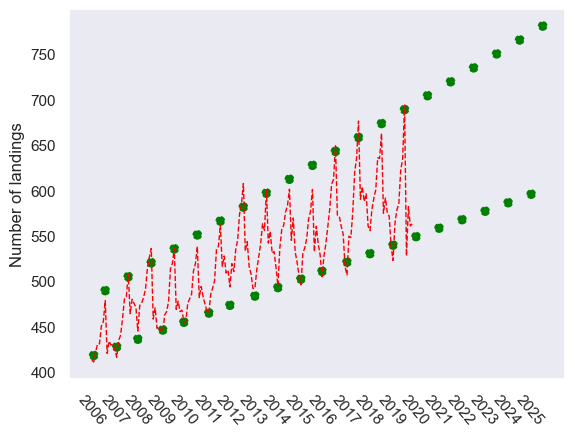

In [26]:
x_ticks_future = np.arange(0, len(X)+yrs_into_future*12, step=12)
x_labels_future = np.arange(2006, yr_to_predict_to + 1)

plt.xticks(x_ticks_future, x_labels_future, rotation=310)
plt.plot(X, y, color="red", linewidth=1,linestyle="dashed")
plt.scatter(x_min_peaks, y_pred_min, color="green", linewidth=1,linestyle="dashed")
plt.scatter(x_max_peaks, y_pred_max, color="green", linewidth=1,linestyle="dashed")
plt.ylabel("Number of landings")
plt.show()

#### Next, I used the linear regression model to plot the expected arrivals in sinusoidal form.

In [27]:
X_pred = np.arange(0, len(X) + T * yrs_into_future)
A_pred = A.copy()
offset_pred = offset.copy()
for i in range(yrs_into_future):
    index = len(max_peaks[1]) + i
    c_a = (y_pred_max[index] - y_pred_min[index])/2
    c_offset = y_pred_min[index] + c_a
    for j in range(0,T):
        A_pred.append(c_a)
        offset_pred.append(c_offset)
    features_pred = [X_pred,A_pred,offset_pred]

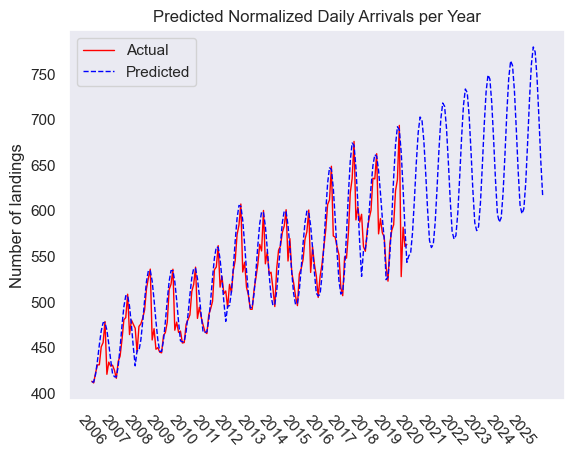

In [28]:
plt.xticks(x_ticks_future, x_labels_future, rotation=310)
plt.plot(X, y, color="red", linewidth=1, label = 'Actual')
plt.plot(X_pred, variable_sinusoid(features_pred, *param), color="blue", linewidth=1, linestyle='dashed', label="Predicted")
plt.ylabel("Number of landings")
plt.title("Predicted Normalized Daily Arrivals per Year")
plt.legend()
plt.show()

#### Finally, I built a function that takes in a the month and the year and outputs the expected number of daily arrivals in that month. This is the first version of the end goal of this project!

In [29]:
def expected_arrivals(month, year):
    assert year <= yr_to_predict_to, "Year " + year + " out of range."
    conversion = (year - 2006) * 12 + month
    return variable_sinusoid(features_pred, *param)[conversion]

In [30]:
expected_arrivals(3, 2023)

649.4446364621853

## Week 3 Wrap Up
This week, I completed the sinusoidal regression model using linear regression. I would like to add confidence intervals and potentially use training/testing to improve the model's accuracy in the future.

## Week 4

### This week, I began looking into the breakdowns of the fuel usage of each aircraft model. I started by looking at a research paper from MIT. I discovered that different aircrafts can actually have quite a significant difference in fuel usage. Specifically, there are four stages per flight:

**1) Idle**

**2) Approach**

**3) Climb-out**

**4) Take-off**


<img src="extra/aircraft_breakdowns.png" style="width:600px;height:300px;">
<caption><center> Figure 1 : Breakdown of fuel usage for different aircraft types</center></caption><br>

### However, these results seemed to vary from the International Civil Aviation Organization (ICAO) database, denoted by a dot on the visual above. I decided to look deeper into ICAO, and I was able to retrieve the database used in the MIT research.

In [31]:
fuel_consumption = pd.read_excel("edb-emissions-databank_v29 (web).xlsx", 'Gaseous Emissions and Smoke')
fuel_consumption.head()

,UID No,GSDB No,Manufacturer,Engine Identification,Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),Data Status,...,Final Test Date,Compliance with fuel venting requirements,Remark 1,Remark 2,Remark 3,Remark 4,Remark 5,Remark 6,Remark 7,Remark 8
0,1AS001,1,Allied Signal,TFE731-2-2B,NaN,TF,2.64,13.90,15.60,PR,...,1976-04-01,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1AS002,1,Allied Signal,TFE731-3,NaN,TF,2.64,14.30,16.50,PR,...,1976-08-01,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4AL003,4,Rolls-Royce Corporation,AE3007A,NaN,MTF,5.23,18.08,33.73,C,...,1995-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6AL004,6,Rolls-Royce Corporation,AE3007C1,NaN,MTF,5.10,16.60,31.50,C,...,1995-04-19,NaN,Results based on Rolls Royce report EDR 15171B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6AL005,6,Rolls-Royce Corporation,AE3007A1,Type 1,MTF,4.77,17.97,34.91,R,...,1995-04-19,NaN,For effectivity see Rolls-Royce Notice to Oper...,Results are based on Rolls-Royce report EDR 15...,AE3007A1 data in this report replace data repo...,NaN,NaN,NaN,NaN,NaN


#### The four stages can also be found in the dataset:

In [32]:
fuel_consumption[["Engine Identification", "HC EI Idle (g/kg)", "HC EI App (g/kg)", "HC EI C/O (g/kg)", "HC EI T/O (g/kg)"]]

,Engine Identification,HC EI Idle (g/kg),HC EI App (g/kg),HC EI C/O (g/kg),HC EI T/O (g/kg)
0,TFE731-2-2B,20.040,4.260,0.128,0.114
1,TFE731-3,9.040,1.410,0.072,0.062
2,AE3007A,2.510,0.640,0.290,0.250
3,AE3007C1,4.840,0.660,0.280,0.240
4,AE3007A1,3.818,0.655,0.257,0.221
...,...,...,...,...,...
826,"LF507-1F, -1H",4.720,0.120,0.010,0.010
827,D-36,5.400,0.000,0.000,0.000
828,D-36 ser. 4A,5.400,0.000,0.000,0.000
829,D-436-148 F1,2.260,0.070,0.040,0.100


### Here, a slight issue that I noticed was that the fuel consumption dataset included the engine types whereas the landings dataset only included the aircraft models.

In [33]:
landings_mod = landings.copy()
landings_mod["Month"] = (landings_mod.loc[:, "Activity Period"] % 100)
landings_mod["Year"] = (landings_mod.loc[:, "Activity Period"] // 100)
landings_mod = landings_mod.drop(columns=["Activity Period"])
landings_mod = landings_mod[(landings_mod["Year"] < 2020) & (landings_mod["Year"] > 2005)]

In [34]:
landings_mod["Aircraft Version"] = landings_mod["Aircraft Version"].fillna('-')
model = landings_mod.groupby(["Aircraft Model", "Aircraft Version"]).sum()
model = model.drop(columns=["Month", "Year"])
model = model.sort_values(by=['Landing Count'], ascending=False)
model.head(20)

,,Landing Count,Total Landed Weight
Aircraft Model,Aircraft Version,,
A320,-,275521,39204907841
757,-,175621,34772962000
EMB,120,134743,3476369400
A320,232,119426,16982272436
737,700,118856,15236054160
CL600,2B19,112331,5279557000
B738,-,101085,14723923200
A321,-,94090,16150883103
CRJ,600,90531,6065577000


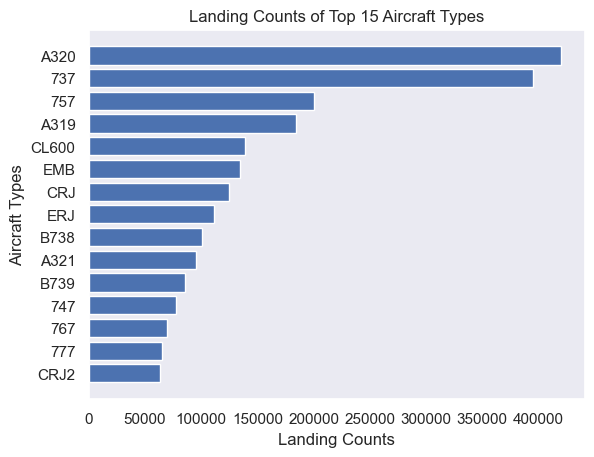

In [35]:
top_models = landings_mod.groupby(["Aircraft Model"]).sum()
top_models = top_models.drop(columns=["Month", "Year"])
top_models = top_models.sort_values(by=['Landing Count'], ascending=False)
top_models = top_models.reset_index().head(15)
top_models = top_models.sort_values(by=['Landing Count'])

plt.barh(top_models['Aircraft Model'], top_models['Landing Count'])
plt.title("Landing Counts of Top 15 Aircraft Types")
plt.xlabel("Landing Counts")
plt.ylabel("Aircraft Types");

In [36]:
top_models['Landing Count'].sum() / landings_mod['Landing Count'].sum()

0.8444496419784628

#### One potential fix for this issue is for me to research what kinds of engines each aircraft model/version uses, and make a new DataFrame matching them up (e.g. https://aircraft-database.com/database/aircraft-models/a320-232). From there, I could combine the datasets so that the models/versions would be matched to their respective engines. For the models with missing Aircraft Versions, I can assume the most popular version of the aircraft.

In [37]:
#A320, 232, V2527-A5
#A320, 214, CFMI CFM56-5B4
#EMB, 120, PW 115/118
#B737, 800, CFM56-7B24/7B26/7B27
#B757, 200, PW 2037/2040
#B737, 700, CFM56-7B20
#A321, 111, CFMI CFM56-5B1 
#A319, 131, V2522-A5

### Finally, using the ICAO Carbon Emissions calculator, I found that $3.16$ is the constant representing the number of tonnes of $CO_2$ produced by burning a tonne of aviation fuel.

### Week 4 Wrap Up
This week, I researched the breakdown of fuel consumption throughout the different stages of the flight. The four stages (idle, approach, climb-out, and take-off) can be considered to be contributing to CO2 emissions at the airport. One thing that I am confused on is that the ICAO database values are 'Hydrocarbon emission index (g/kg)' for each stage. I'm not completely sure what this entails in terms of gallons of aviation fuel and/or carbon emissions.

## Week 5
### This week, I started out by finding the column  $Fuel\:LTO\: Cycle\:(kg)$  that contains the total fuel used during the LTO Cycle in kg. ICAO defines the LTO Cycle as the four stages covered last week.

In [38]:
engines = fuel_consumption[["Engine Identification", "Fuel LTO Cycle (kg)  "]]
engines.head()

,Engine Identification,Fuel LTO Cycle (kg)
0,TFE731-2-2B,85.0
1,TFE731-3,92.0
2,AE3007A,162.0
3,AE3007C1,138.0
4,AE3007A1,157.0


### I then began hardcoding the different engine types and matched them with the different aircraft types. I did this for the top 30 aircraft models and versions. 

In [39]:
eng_id = ['V2527-A5', 'V2527-A5', 'CFM56-5B4', 'PW1124G1-JM', 'JT8D-15', 'CFM56-3B-2', 'CFM56-7B20', 'CFM56-7B20', 
          'CFM56-7B26', 'CFM56-7B26', 'CF6-80C2B1F', 'PW2037', 'CF6-80C2B2F','GE90-115B', 'V2522-A5', "V2522-A5", 'CFM56-5B1', 
          'CF34-3A', 'CF34-3A1', 'PW1124G1-JM', 'CFM56-7B26', 'CFM56-7B27', 'CF34-3A1', 'CF34-8E5', 'CF34-3A', 'PW2037',
         'CFM56-3B-2', 'CF34-8E5', 'CF34-8E5A1', 'PW4090', 'RB211-524G']
aircraft_model = ["A320", "A320", "A320", "EMB", "737", "737", "737", "B738", "B739", "737", "747", "757", "767", 
                  "777", "A319", "A319", "A321", "CL600", "CRJ", "ERJ", "B737", "737", "CRJ2", "E170", "CL600", "B752", "737",
                 'ERJ', "E175", "B773", "747"]
aircraft_vers = ["-", "232", "214", "120", "300", "700", "800", "-", "-", "900", "400", "-", "300", "300ER", "131", 
                 "-", "-", "2B19", "600", "120", "-", "-", "-", "-", "-", "-", "400", "175", "-", "-", "422"]
data = {'Engine Identification': eng_id,
        'Aircraft Model': aircraft_model,
        'Aircraft Version': aircraft_vers}
eng_mod_vers = pd.DataFrame(data)
eng_mod_vers

,Engine Identification,Aircraft Model,Aircraft Version
0,V2527-A5,A320,-
1,V2527-A5,A320,232
2,CFM56-5B4,A320,214
3,PW1124G1-JM,EMB,120
4,JT8D-15,737,300
5,CFM56-3B-2,737,700
6,CFM56-7B20,737,800
7,CFM56-7B20,B738,-
8,CFM56-7B26,B739,-
9,CFM56-7B26,737,900


### Next, I began merging the datasets into one.

In [40]:
#join the engines and the aircraft models together
models = model.reset_index()
models = models.merge(eng_mod_vers, how='left', on=["Aircraft Model", "Aircraft Version"])
models

,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,Engine Identification
0,A320,-,275521,39204907841,V2527-A5
1,757,-,175621,34772962000,PW2037
2,EMB,120,134743,3476369400,PW1124G1-JM
3,A320,232,119426,16982272436,V2527-A5
4,737,700,118856,15236054160,CFM56-3B-2
...,...,...,...,...,...
196,767,275,1,272000,NaN
197,767,3Y0,1,199000,NaN
198,777,200LR,1,492000,NaN
199,C402,-,1,6850,NaN


#### Because I matched 30 Aircraft Models and Aircraft Versions with their respective Engine Identifications, this meant that we have accurate data for about 82.6% of the flights.

In [41]:
models['Landing Count'].head(30).sum() / landings_mod['Landing Count'].sum()

0.8261135613180317

In [42]:
# ensure each Engine Identification maps to one Fuel LTO Cycle (kg)
engines = engines.groupby('Engine Identification').mean().reset_index()
engines.head()

,Engine Identification,Fuel LTO Cycle (kg)
0,AE3007A,162.0
1,AE3007A1,157.0
2,AE3007A1 series,164.0
3,AE3007A1/1,156.0
4,AE3007A1/3,151.0


In [43]:
#join the previously merged models dataset and the Fuel LTO (kg) together
models = models.merge(engines, how='left', on='Engine Identification')
models

,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,Engine Identification,Fuel LTO Cycle (kg)
0,A320,-,275521,39204907841,V2527-A5,437.000000
1,757,-,175621,34772962000,PW2037,566.500000
2,EMB,120,134743,3476369400,PW1124G1-JM,284.073333
3,A320,232,119426,16982272436,V2527-A5,437.000000
4,737,700,118856,15236054160,CFM56-3B-2,421.000000
...,...,...,...,...,...,...
196,767,275,1,272000,NaN,NaN
197,767,3Y0,1,199000,NaN,NaN
198,777,200LR,1,492000,NaN,NaN
199,C402,-,1,6850,NaN,NaN


### We also have to take into consideration that some aircrafts have multiple engines. Of the 30 top aircraft types, I went through and adjusted the Fuel LTO Cycle (kg) to account for multiple engines.

In [44]:
if (models['Fuel LTO Cycle (kg)  '][0] == 437):
    models['Fuel LTO Cycle (kg)  '] = models['Fuel LTO Cycle (kg)  '] * 2
    models.loc[models['Aircraft Model']=='747', ['Fuel LTO Cycle (kg)  ']] *= 2
models

,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,Engine Identification,Fuel LTO Cycle (kg)
0,A320,-,275521,39204907841,V2527-A5,874.000000
1,757,-,175621,34772962000,PW2037,1133.000000
2,EMB,120,134743,3476369400,PW1124G1-JM,568.146667
3,A320,232,119426,16982272436,V2527-A5,874.000000
4,737,700,118856,15236054160,CFM56-3B-2,842.000000
...,...,...,...,...,...,...
196,767,275,1,272000,NaN,NaN
197,767,3Y0,1,199000,NaN,NaN
198,777,200LR,1,492000,NaN,NaN
199,C402,-,1,6850,NaN,NaN


### Here, we have accurate fuel data for about 82.6% of the flights because we matched them with the correct aircraft models and versions. For the remaining flights, we can fill the missing values with the mean of the accurate data.

In [45]:
fill_mean_val = models['Fuel LTO Cycle (kg)  '].mean()
models['Fuel LTO Cycle (kg)  '] = models['Fuel LTO Cycle (kg)  '].fillna(fill_mean_val)
models

,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,Engine Identification,Fuel LTO Cycle (kg)
0,A320,-,275521,39204907841,V2527-A5,874.000000
1,757,-,175621,34772962000,PW2037,1133.000000
2,EMB,120,134743,3476369400,PW1124G1-JM,568.146667
3,A320,232,119426,16982272436,V2527-A5,874.000000
4,737,700,118856,15236054160,CFM56-3B-2,842.000000
...,...,...,...,...,...,...
196,767,275,1,272000,NaN,1069.110194
197,767,3Y0,1,199000,NaN,1069.110194
198,777,200LR,1,492000,NaN,1069.110194
199,C402,-,1,6850,NaN,1069.110194


### The completed combined dataset! I combined the fuel usage column with the initial (modified) landings dataset. I also created a new column that multiplies the number of landings by the fuel.

In [46]:
fuel_per_model = models[["Aircraft Model", "Aircraft Version", 'Fuel LTO Cycle (kg)  ']]
landings_final = landings_mod.merge(fuel_per_model, how='left', on=["Aircraft Model", "Aircraft Version"])
landings_final['Fuel * Landings'] = landings_final["Landing Count"] * landings_final['Fuel LTO Cycle (kg)  ']
landings_final

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,Month,Year,Fuel LTO Cycle (kg),Fuel * Landings
0,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Wide Body,Boeing,767,-,37,10064000,1,2006,1069.110194,39557.077161
1,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,10,1020000,1,2006,1069.110194,10691.101935
2,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,737,800,124,18141200,1,2006,722.000000,89528.000000
3,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,8,1584000,1,2006,1069.110194,8552.881548
4,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,2,448000,1,2006,1069.110194,2138.220387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,United Airlines,UA,United Airlines,UA,International,Australia / Oceania,Passenger,Wide Body,Boeing,B789,-,20,8500000,12,2019,1069.110194,21382.203871
23630,United Airlines,UA,United Airlines,UA,International,Europe,Passenger,Wide Body,Boeing,B789,-,27,11475000,12,2019,1069.110194,28865.975226
23631,United Airlines,UA,United Airlines,UA,Domestic,US,Passenger,Wide Body,Boeing,B78X,-,42,18690000,12,2019,1069.110194,44902.628129
23632,United Airlines,UA,United Airlines,UA,International,Australia / Oceania,Passenger,Wide Body,Boeing,B78X,-,24,10680000,12,2019,1069.110194,25658.644645


### As before, I normalized the data so that we would be considering the daily values. I also picked out the columns we wanted to look at.

In [47]:
monthly_final = landings_final.loc[:, ["Month", "Year", 'Fuel * Landings']]
monthly_final = monthly_final.groupby(["Year","Month"]).sum()
monthly_final = monthly_final.reset_index()

monthly_final['Days Per Month'] = monthly_final['Month'].apply(lambda x: days_per_month[x])
monthly_final['Fuel Per Day (kg/day)'] = monthly_final['Fuel * Landings'] / monthly_final['Days Per Month']
monthly_final.head()

,Year,Month,Fuel * Landings,Days Per Month,Fuel Per Day (kg/day)
0,2006,1,1.260937e+07,31.000000,406754.030554
1,2006,2,1.125166e+07,28.214286,398793.108450
2,2006,3,1.280430e+07,31.000000,413041.802015
3,2006,4,1.279115e+07,30.000000,426371.763925
4,2006,5,1.325273e+07,31.000000,427507.331899


In [48]:
monthly_final = monthly_final.drop(columns=['Fuel * Landings', 'Days Per Month'])
monthly_final.head()

,Year,Month,Fuel Per Day (kg/day)
0,2006,1,406754.030554
1,2006,2,398793.108450
2,2006,3,413041.802015
3,2006,4,426371.763925
4,2006,5,427507.331899


### From here, I repeated the steps from before to visualize the data.

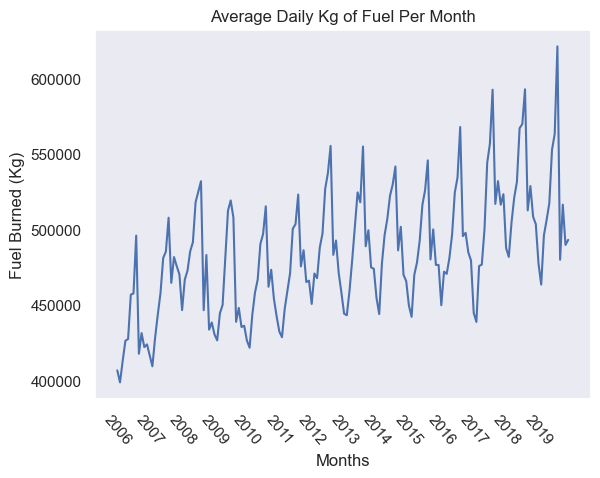

In [49]:
X2 = np.arange(0, len(monthly_final))
y2 = monthly_final['Fuel Per Day (kg/day)'].tolist()
plt.plot(X2, y2)
x_ticks = np.arange(0, len(X2), step=12)
x_labels = np.arange(2006, 2020)
plt.xticks(x_ticks, x_labels, rotation=310)
plt.title("Average Daily Kg of Fuel Per Month")
plt.xlabel("Months")
plt.ylabel("Fuel Burned (Kg)")
plt.show()

#### Approximate the data:

In [50]:
min_peaks2 = get_peaks(y2,min)
max_peaks2 = get_peaks(y2,max)
A2 = []
offset2 = []
for i in range(0, len(min_peaks2[1])):
    c_a = (max_peaks2[1][i] - min_peaks2[1][i])/2
    c_offset = min_peaks2[1][i] + c_a
    for j in range(0,T):
        A2.append(c_a)
        offset2.append(c_offset)
features2 = [X2, A2, offset2]

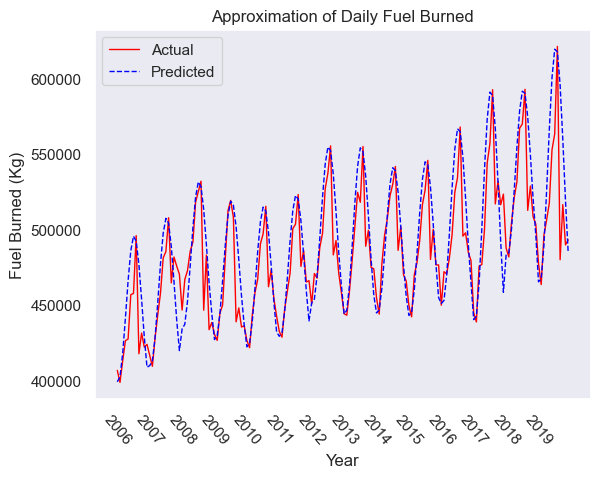

In [51]:
param, covariance = curve_fit(variable_sinusoid, features2, y2, p0=variable_get_p0(X2,y2))
plt.xticks(x_ticks, x_labels, rotation=310)
plt.title("Approximation of Daily Fuel Burned")
plt.ylabel("Fuel Burned (Kg)")
plt.xlabel("Year")
plt.plot(X2, y2, color="red", linewidth=1, label = 'Actual')
plt.plot(X2, variable_sinusoid(features2, *param), color="blue", linestyle="dashed", linewidth=1, label='Predicted')
plt.legend()
plt.show()

### Finally, I used the same linear regression model as before to visualize the data sinusoidally.

In [52]:
# reshape x_peaks
x_min_peaks2 = list(map(lambda l:[l], min_peaks2[0])) 
x_max_peaks2 = list(map(lambda l:[l], max_peaks2[0]))
# min model
model_min2 = linear_model.LinearRegression()
model_min2.fit(x_min_peaks2,min_peaks2[1])
# max model
model_max2 = linear_model.LinearRegression()
model_max2.fit(x_max_peaks2,max_peaks2[1])


yr_to_predict_to = 2025


yrs_into_future = yr_to_predict_to - 2019
for i in range(1, yrs_into_future + 1):
    x_min_peaks2.append([x_min_peaks2[len(x_min_peaks2) -1][0] + T])
    x_max_peaks2.append([x_max_peaks2[len(x_max_peaks2) -1][0] + T])
y_pred_min2 = model_min2.predict(x_min_peaks2)
y_pred_max2 = model_max2.predict(x_max_peaks2)


In [53]:
x_ticks_future = np.arange(0, len(X2)+yrs_into_future*12, step=12)
x_labels_future = np.arange(2006, yr_to_predict_to + 1)

X_pred2 = np.arange(0, len(X2) + T * yrs_into_future)
A_pred2 = A2.copy()
offset_pred2 = offset2.copy()
for i in range(yrs_into_future):
    index = len(max_peaks2[1]) + i
    c_a = (y_pred_max2[index] - y_pred_min2[index])/2
    c_offset = y_pred_min2[index] + c_a
    for j in range(0,T):
        A_pred2.append(c_a)
        offset_pred2.append(c_offset)
    features_pred2 = [X_pred2,A_pred2,offset_pred2]

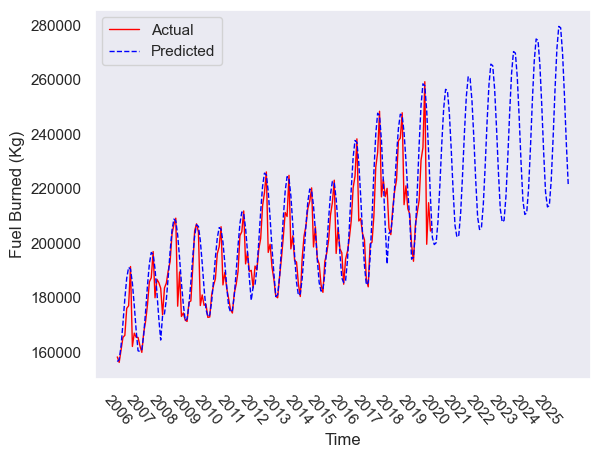

In [68]:
plt.xticks(x_ticks_future, x_labels_future, rotation=310)
plt.plot(X2, y2, color="red", linewidth=1, label = 'Actual')
plt.plot(X_pred2, variable_sinusoid(features_pred2, *param), color="blue", linewidth=1, linestyle='dashed', label="Predicted")
plt.ylabel("Fuel Burned (Kg)")
plt.xlabel("Time")
# plt.title("Predicted Normalized Daily Fuel Burned per Month of the Year")
plt.legend()
plt.show()

## Grand Finale!

In [55]:
def expected_CO2_emissions(month, year):
    assert year <= yr_to_predict_to, "Year " + year + " out of range."
    conversion = (year - 2006) * 12 + month
    const = 3.16
    kg_of_co2 = (int) (np.round(3.16 * (variable_sinusoid(features_pred2, *param)[conversion])))
    tonnes_of_co2 = (int) (np.round(kg_of_co2 / 1000))
    return "In " + str(month) + "/" + str(year) + ", there will be " + str(kg_of_co2) + " kg, or " + str(tonnes_of_co2) + " tonnes of CO2 released per day from SFO."

In [56]:
expected_CO2_emissions(3, 2023)

'In 3/2023, there will be 1708127 kg, or 1708 tonnes of CO2 released per day from SFO.'

## Week 5 Wrap Up
SFO data analysis complete! After hours of configuring the data, I was able to combine different DataFrames to match the Aircraft Model, Aircraft Version, Engine ID, and Kg of Fuel burned during the LTO Cycle. Next, I built a linear regression model to predict the kg of fuel burned using a sinusoidal function. Finally, I created a function that takes in the month and year and returns the daily kg/tonnes of carbon released, using the conversion rate: $1\:kg\:Aviation\: Fuel\:= \:3.16\: kg CO_2$

## Week 6

### Per last week's discussions, I limited my data to only include the taxi and take-off stages (leaving out the approach and climb-out). I also used the fuel flow columns and the times spent in each stage to calculate the emissions.

**1) Taxi = 26 minutes** 

**2) Take-off = 0.7 minutes**

In [57]:
idle_time = 26 * 60
to_time = 0.7 * 60
engines = fuel_consumption[["Engine Identification", "Fuel Flow Idle (kg/sec)", "Fuel Flow T/O (kg/sec)"]]
engines['Idle Fuel (kg)'] = idle_time * engines['Fuel Flow Idle (kg/sec)']
engines['T/O Fuel (kg)'] = to_time * engines['Fuel Flow Idle (kg/sec)']
engines['Fuel Used (kg)'] = engines['T/O Fuel (kg)'] + engines['Idle Fuel (kg)']
engines = engines.drop(columns=["Fuel Flow Idle (kg/sec)", "Fuel Flow T/O (kg/sec)", 'Idle Fuel (kg)', 'T/O Fuel (kg)'])
engines.head()

,Engine Identification,Fuel Used (kg)
0,TFE731-2-2B,38.4480
1,TFE731-3,41.6520
2,AE3007A,78.4980
3,AE3007C1,67.2840
4,AE3007A1,73.8522


In [58]:
models = model.reset_index()
models = models.merge(eng_mod_vers, how='left', on=["Aircraft Model", "Aircraft Version"])
engines = engines.groupby('Engine Identification').mean().reset_index()
engines.head()

,Engine Identification,Fuel Used (kg)
0,AE3007A,78.4980
1,AE3007A1,73.8522
2,AE3007A1 series,80.1000
3,AE3007A1/1,73.5318
4,AE3007A1/3,71.9298


#### I also removed the doubling of the 747 aircraft (the only 4 engine aircraft) before using the average for the rest of the data.

In [59]:
models = models.merge(engines, how='left', on='Engine Identification')
models['Fuel Used (kg)'] = models['Fuel Used (kg)'] * 2
fill_mean_val = models['Fuel Used (kg)'].mean()
models['Fuel Used (kg)'] = models['Fuel Used (kg)'].fillna(fill_mean_val)
models

,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,Engine Identification,Fuel Used (kg)
0,A320,-,275521,39204907841,V2527-A5,410.112000
1,757,-,175621,34772962000,PW2037,469.386000
2,EMB,120,134743,3476369400,PW1124G1-JM,256.320000
3,A320,232,119426,16982272436,V2527-A5,410.112000
4,737,700,118856,15236054160,CFM56-3B-2,381.276000
...,...,...,...,...,...,...
196,767,275,1,272000,NaN,403.752232
197,767,3Y0,1,199000,NaN,403.752232
198,777,200LR,1,492000,NaN,403.752232
199,C402,-,1,6850,NaN,403.752232


In [60]:
fuel_per_model = models[["Aircraft Model", "Aircraft Version", 'Fuel Used (kg)']]
landings_final = landings_mod.merge(fuel_per_model, how='left', on=["Aircraft Model", "Aircraft Version"])
landings_final['Fuel * Landings'] = landings_final["Landing Count"] * landings_final['Fuel Used (kg)']

monthly_final = landings_final.loc[:, ["Month", "Year", 'Fuel * Landings']]
monthly_final = monthly_final.groupby(["Year","Month"]).sum()
monthly_final = monthly_final.reset_index()

monthly_final['Days Per Month'] = monthly_final['Month'].apply(lambda x: days_per_month[x])
monthly_final['Fuel Per Day (kg/day)'] = monthly_final['Fuel * Landings'] / monthly_final['Days Per Month']
monthly_final = monthly_final.drop(columns=['Fuel * Landings', 'Days Per Month'])
monthly_final.head()

,Year,Month,Fuel Per Day (kg/day)
0,2006,1,158054.962897
1,2006,2,156042.703340
2,2006,3,160677.631605
3,2006,4,165234.057964
4,2006,5,165989.870717


#### From here, I just used the same code as last week to build the updated regression model.

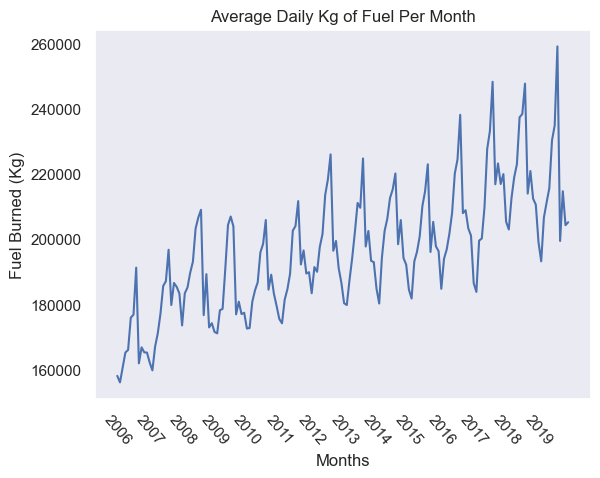

In [61]:
X2 = np.arange(0, len(monthly_final))
y2 = monthly_final['Fuel Per Day (kg/day)'].tolist()
plt.plot(X2, y2)
x_ticks = np.arange(0, len(X2), step=12)
x_labels = np.arange(2006, 2020)
plt.xticks(x_ticks, x_labels, rotation=310)
plt.title("Average Daily Kg of Fuel Per Month")
plt.xlabel("Months")
plt.ylabel("Fuel Burned (Kg)")
plt.show()

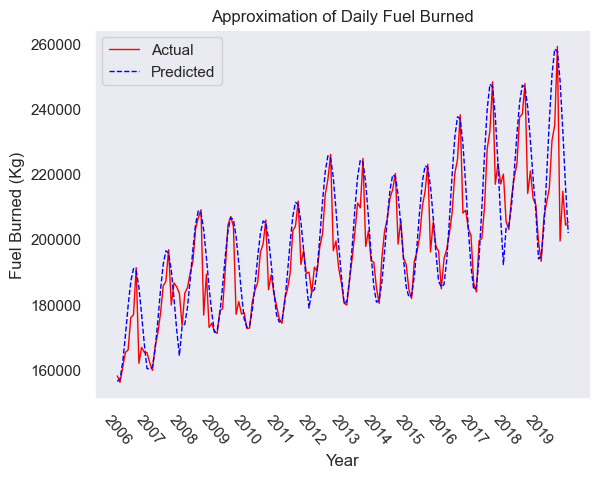

In [62]:
min_peaks2 = get_peaks(y2,min)
max_peaks2 = get_peaks(y2,max)
A2 = []
offset2 = []
for i in range(0, len(min_peaks2[1])):
    c_a = (max_peaks2[1][i] - min_peaks2[1][i])/2
    c_offset = min_peaks2[1][i] + c_a
    for j in range(0,T):
        A2.append(c_a)
        offset2.append(c_offset)
features2 = [X2, A2, offset2]

param, covariance = curve_fit(variable_sinusoid, features2, y2, p0=variable_get_p0(X2,y2))
plt.xticks(x_ticks, x_labels, rotation=310)
plt.title("Approximation of Daily Fuel Burned")
plt.ylabel("Fuel Burned (Kg)")
plt.xlabel("Year")
plt.plot(X2, y2, color="red", linewidth=1, label = 'Actual')
plt.plot(X2, variable_sinusoid(features2, *param), color="blue", linestyle="dashed", linewidth=1, label='Predicted')
plt.legend()
plt.show()

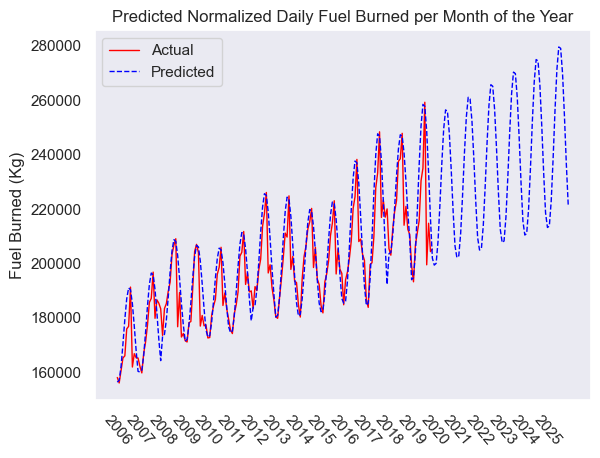

In [63]:
# reshape x_peaks
x_min_peaks2 = list(map(lambda l:[l], min_peaks2[0])) 
x_max_peaks2 = list(map(lambda l:[l], max_peaks2[0]))
# min model
model_min2 = linear_model.LinearRegression()
model_min2.fit(x_min_peaks2,min_peaks2[1])
# max model
model_max2 = linear_model.LinearRegression()
model_max2.fit(x_max_peaks2,max_peaks2[1])


yr_to_predict_to = 2025


yrs_into_future = yr_to_predict_to - 2019
for i in range(1, yrs_into_future + 1):
    x_min_peaks2.append([x_min_peaks2[len(x_min_peaks2) -1][0] + T])
    x_max_peaks2.append([x_max_peaks2[len(x_max_peaks2) -1][0] + T])
y_pred_min2 = model_min2.predict(x_min_peaks2)
y_pred_max2 = model_max2.predict(x_max_peaks2)

x_ticks_future = np.arange(0, len(X2)+yrs_into_future*12, step=12)
x_labels_future = np.arange(2006, yr_to_predict_to + 1)

X_pred2 = np.arange(0, len(X2) + T * yrs_into_future)
A_pred2 = A2.copy()
offset_pred2 = offset2.copy()
for i in range(yrs_into_future):
    index = len(max_peaks2[1]) + i
    c_a = (y_pred_max2[index] - y_pred_min2[index])/2
    c_offset = y_pred_min2[index] + c_a
    for j in range(0,T):
        A_pred2.append(c_a)
        offset_pred2.append(c_offset)
    features_pred2 = [X_pred2,A_pred2,offset_pred2]

plt.xticks(x_ticks_future, x_labels_future, rotation=310)
plt.plot(X2, y2, color="red", linewidth=1, label = 'Actual')
plt.plot(X_pred2, variable_sinusoid(features_pred2, *param), color="blue", linewidth=1, linestyle='dashed', label="Predicted")
plt.ylabel("Fuel Burned (Kg)")
plt.title("Predicted Normalized Daily Fuel Burned per Month of the Year")
plt.legend()
plt.show()


### And the updated CO2 function:

In [64]:
def expected_CO2_emissions(month, year):
    assert year <= yr_to_predict_to, "Year " + year + " out of range."
    conversion = (year - 2006) * 12 + month
    const = 3.16
    kg_of_co2 = (int) (np.round(3.16 * (variable_sinusoid(features_pred2, *param)[conversion])))
    tonnes_of_co2 = (int) (np.round(kg_of_co2 / 1000))
    return "In " + str(month) + "/" + str(year) + ", there will be " + str(kg_of_co2) + " kg, or " + str(tonnes_of_co2) + " tonnes of CO2 released per day from SFO."


In [65]:
expected_CO2_emissions(3, 2023)

'In 3/2023, there will be 732064 kg, or 732 tonnes of CO2 released per day from SFO.'